In [81]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [82]:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/insurance.csv')

In [83]:
df.shape

(1338, 7)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [85]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [86]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [88]:
df.select_dtypes(exclude='number').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [89]:
numerical_columns = ['age', 'bmi', 'children','charges']
categorical_columns = ['sex', 'smoker', 'region']

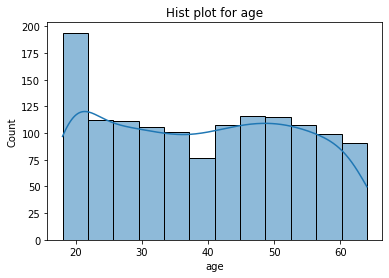

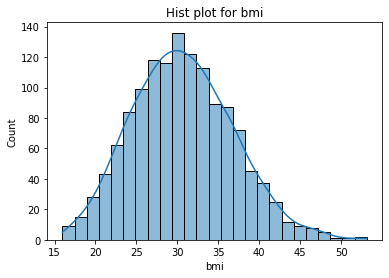

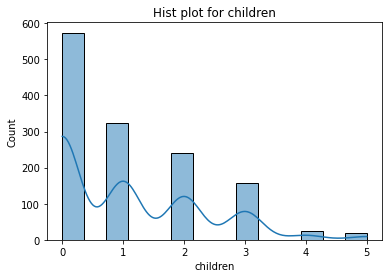

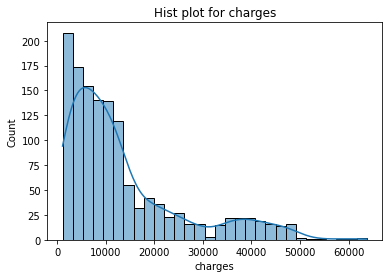

--------------------------------------------------


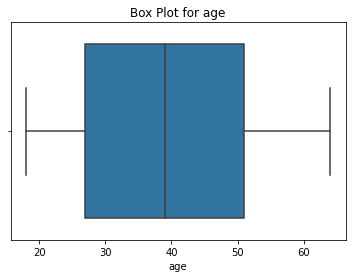

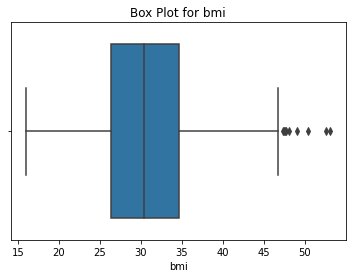

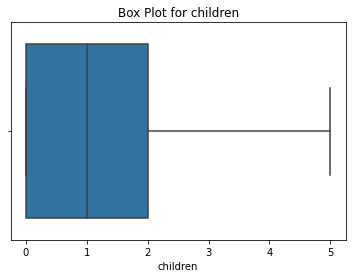

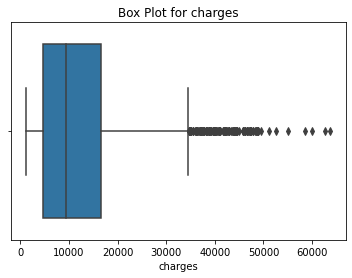

--------------------------------------------------


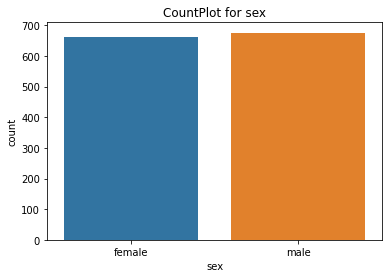

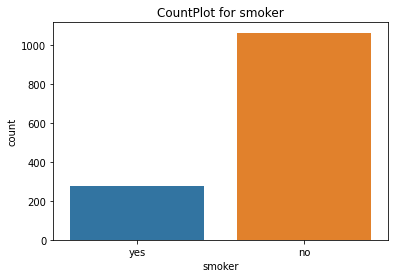

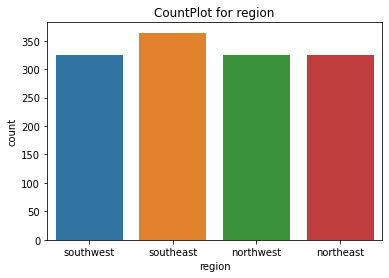

--------------------------------------------------


In [90]:
for col in numerical_columns:
    sns.histplot(data=df,x=col,kde=True)
    plt.title(f"Hist plot for {col}")
    plt.show()

print('-'*50)

for col in numerical_columns:
    sns.boxplot(data=df,x=col)
    plt.title(f"Box Plot for {col}")
    plt.show()

print('-'*50)

for col in categorical_columns:
    sns.countplot(data=df,x=col)
    plt.title(f"CountPlot for {col}")
    plt.show()

print('-'*50)


<AxesSubplot:>

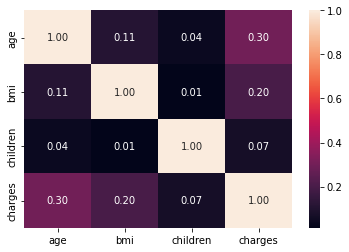

In [91]:
corr = df.corr()

sns.heatmap(corr,annot=True,fmt='.2f')

In [92]:
X = df.drop(columns='charges')
y = df['charges']

In [93]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [94]:
y.shape

(1338,)

In [95]:
# from sklearn.preprocessing import StandardScaler

# scale = StandardScaler()
# y = scale.fit_transform(y.values.reshape(-1,1))

from sklearn.preprocessing import FunctionTransformer

func_tranform = FunctionTransformer(np.log1p)
y = func_tranform.fit_transform(y)

In [96]:
y

0        9.734236
1        7.453882
2        8.400763
3        9.998137
4        8.260455
          ...    
1333     9.268755
1334     7.699381
1335     7.396847
1336     7.605365
1337    10.279948
Name: charges, Length: 1338, dtype: float64

In [97]:
updated_num = ['age', 'bmi', 'children',]

from sklearn.feature_selection import f_regression

significant_columns = {}

for col in updated_num:
    X_feature = df[[col]]
    F,p_value = f_regression(X_feature,y)

    if p_value < 0.05:
        significant_columns[col] = {
            'f': F,
            'p_val': p_value
        }

    print(f"{col}-F {F[0]:.4f},p_value={p_value[0]:.4f}")

print(significant_columns.keys())


age-F 515.9048,p_value=0.0000
bmi-F 23.9396,p_value=0.0000
children-F 35.6957,p_value=0.0000
dict_keys(['age', 'bmi', 'children'])


In [98]:
from scipy.stats import spearmanr
for col in updated_num:
    corr, p_value = spearmanr(df[col], y)
    print(f"{col} - Spearman Correlation: {corr:.4f}, p_value: {p_value:.4f}")

age - Spearman Correlation: 0.5344, p_value: 0.0000
bmi - Spearman Correlation: 0.1194, p_value: 0.0000
children - Spearman Correlation: 0.1333, p_value: 0.0000


In [99]:
from scipy.stats import f_oneway
significant_cat_columns = {}

for col in categorical_columns:
    groups = [df[df[col]== category]['charges'] for category in df[col].unique()]

    F,p_value = f_oneway(*groups)

    print(f"{col}- F:{F:.4f},p_value:{p_value:.4f}")

    if p_value < 0.05:
        significant_cat_columns[col] = {
            'F': F,
            'p_value':p_value
        }

print(significant_cat_columns.keys())


sex- F:4.3997,p_value:0.0361
smoker- F:2177.6149,p_value:0.0000
region- F:2.9696,p_value:0.0309
dict_keys(['sex', 'smoker', 'region'])


In [100]:
X = df[updated_num+categorical_columns]

In [101]:
X.head()

,age,bmi,children,sex,smoker,region
0,19,27.900,0,female,yes,southwest
1,18,33.770,1,male,no,southeast
2,28,33.000,3,male,no,southeast
3,33,22.705,0,male,no,northwest
4,32,28.880,0,male,no,northwest


In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [103]:
X_train.head()

,age,bmi,children,sex,smoker,region
560,46,19.95,2,female,no,northwest
1285,47,24.32,0,female,no,northeast
1142,52,24.86,0,female,no,southeast
969,39,34.32,5,female,no,southeast
486,54,21.47,3,female,no,northwest


In [104]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer


num_pipeline = Pipeline([
    ('num_robuse',RobustScaler()),
    ('stadard',StandardScaler()),
    ('impute',SimpleImputer(strategy='median')),
])


cat_pipeline = Pipeline([
    ('cat_impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(drop='first',sparse=False))

])

In [105]:
from sklearn.compose import ColumnTransformer

preprocess_columns = ColumnTransformer([
    ('num_preprocess',num_pipeline,updated_num),
    ('cat_preprocess',cat_pipeline,categorical_columns),

])

In [106]:
X_train_preprocessed = preprocess_columns.fit_transform(X_train)
X_test_preprocessed = preprocess_columns.transform(X_test)

In [107]:
X_train_preprocessed.shape[1]

8

In [108]:
input_shape = X_train_preprocessed.shape[1]

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

model = Sequential([
    Dense(64,activation='relu',input_shape=(input_shape,)),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(1)

])

In [110]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                576       
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

In [112]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [113]:
history = model.fit(
    X_train_preprocessed,y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
    )

Epoch 1/100
27/27 [==============================] - 1s 6ms/step - loss: 73.5209 - mse: 73.5209 - val_loss: 59.3562 - val_mse: 59.3562
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 47.3297 - mse: 47.3297 - val_loss: 30.2222 - val_mse: 30.2222
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 18.7553 - mse: 18.7553 - val_loss: 6.7624 - val_mse: 6.7624
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 6.4977 - mse: 6.4977 - val_loss: 2.9406 - val_mse: 2.9406
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 5.9913 - mse: 5.9913 - val_loss: 2.8147 - val_mse: 2.8147
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 5.5792 - mse: 5.5792 - val_loss: 2.6987 - val_mse: 2.6987
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 5.3729 - mse: 5.3729 - val_loss: 2.4831 - val_mse: 2.4831
Epoch 8/100
27/27 [==============================] - 0s 1ms/step - loss: 

In [114]:
# Evaluate on scaled data

test_loss, test_mse = model.evaluate(X_test_preprocessed, y_test)
print(f"Test Loss (MSE on log-transformed y): {test_loss}")
print(f"Test MSE: {test_mse}")

9/9 [==============================] - 0s 622us/step - loss: 0.2398 - mse: 0.2398
Test Loss (MSE on log-transformed y): 0.23984743654727936
Test MSE: 0.23984743654727936


In [115]:
from sklearn.metrics import r2_score

# Generate predictions on the test set
y_pred = model.predict(X_test_preprocessed)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.7332


In [116]:
import joblib
# Save the model and preprocessing pipeline
model.save('insurance_model.h5')
joblib.dump(preprocess_columns, 'preprocess_pipeline.pkl')

['preprocess_pipeline.pkl']

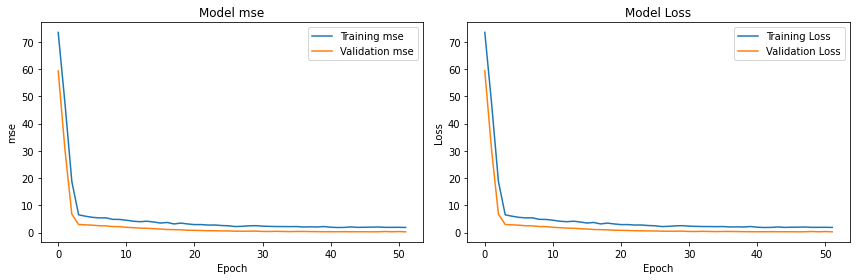

In [117]:
# Visualize training history
plt.figure(figsize=(12, 4))

# Plot mse
plt.subplot(1, 2, 1)
plt.plot(history.history['mse'], label='Training mse')
plt.plot(history.history['val_mse'], label='Validation mse')
plt.title('Model mse')
plt.xlabel('Epoch')
plt.ylabel('mse')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Prediction

In [118]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model

model = load_model('insurance_model.h5')
preprocess_pipeline = joblib.load('preprocess_pipeline.pkl')


# data = {
#     'age': [19, 18, 28, 33, 32],
#     'bmi': [27.9, 33.77, 33.0, 22.705, 28.88],
#     'children': [0, 1, 3, 0, 0],
#     'sex': ['female', 'male', 'male', 'male', 'male'],
#     'smoker': ['yes', 'no', 'no', 'no', 'no'],
#     'region': ['southwest', 'southeast', 'southeast', 'northwest', 'northwest']
# }

data = {
    'age': [28],
    'bmi': [33.0],
    'children': [2],
    'sex': ['male'],
    'smoker': ['no'],
    'region': ['southeast']
}

df_sample = pd.DataFrame(data)

X_sample_preprocessed = preprocess_pipeline.transform(df_sample)

predictions_log = model.predict(X_sample_preprocessed)

predictions = np.expm1(predictions_log)

print(predictions[0][0])



3302.3633


## Alternative method

In [122]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
from scikeras.wrappers import KerasRegressor  # pip install scikeras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assume df is already loaded as in your code:
df = pd.read_csv('/home/suhas/Desktop/office/Data Science/Notes/Data Analysis/Data/insurance.csv')

# Define your feature and target columns:
updated_num = ['age', 'bmi', 'children']  # Only numerical features (exclude target 'charges')
categorical_columns = ['sex', 'smoker', 'region']

# Create X and y (apply log1p to target)
X = df[updated_num + categorical_columns]
y = df['charges']
y = np.log1p(y)

# Build the preprocessing pipeline
num_pipeline = Pipeline([
    ('num_robust', RobustScaler()),
    ('standard', StandardScaler()),
    ('impute', SimpleImputer(strategy='median')),
])

cat_pipeline = Pipeline([
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', sparse=False))
])

preprocess_columns = ColumnTransformer([
    ('num_preprocess', num_pipeline, updated_num),
    ('cat_preprocess', cat_pipeline, categorical_columns),
])

# Define a function to build the Keras model
def build_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model

# Since we know from our preprocessing pipeline, the number of features is:
#  - updated_num: 3 features
#  - categorical: for example, if 'sex' and 'smoker' have 2 categories each -> 1 dummy each (drop='first'),
#                 and 'region' has 4 unique values -> 3 dummies.
# Total features = 3 + 1 + 1 + 3 = 8.
input_shape_value = 8

# Wrap the model using scikeras
keras_reg = KerasRegressor(
    model=build_model,
    model__input_shape=input_shape_value,  # Pass the input shape to the model builder
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)],
    verbose=0
)

# Create a complete pipeline combining preprocessing and the Keras model
pipeline = Pipeline([
    ('preprocess', preprocess_columns),
    ('model', keras_reg)
])

# Now perform 5-fold cross-validation using R² score as the metric.
# We use the r2_score directly via the scoring parameter.
scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

print("R² Scores for each fold:", scores)
print("Average R² Score:", np.mean(scores))


R² Scores for each fold: [0.75243743 0.51807493 0.77963722 0.62671868 0.59966898]
Average R² Score: 0.6553074471233453
